# Шаг 1. Изучаем общую информацию и подготавливаем данные.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#calls = pd.read_csv('calls.csv')
#internet = pd.read_csv('internet.csv')
#messages = pd.read_csv('messages.csv')
#tariffs = pd.read_csv('tariffs.csv')
#users = pd.read_csv('users.csv')

calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [2]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
#просматриваем общую информацию по звонкам
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Пропусков нет. Необходимо заменить тип данных в колонке call_date и id.

In [4]:
#смотрим основные статистические характеристики
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [5]:
print(calls.query('duration == 0'))

              id   call_date  duration  user_id
0         1000_0  2018-07-25       0.0     1000
1         1000_1  2018-08-17       0.0     1000
5         1000_5  2018-11-02       0.0     1000
6         1000_6  2018-10-18       0.0     1000
9         1000_9  2018-08-15       0.0     1000
...          ...         ...       ...      ...
202590  1499_203  2018-12-03       0.0     1499
202592  1499_205  2018-10-13       0.0     1499
202593  1499_206  2018-12-26       0.0     1499
202594  1499_207  2018-10-28       0.0     1499
202596  1499_209  2018-12-16       0.0     1499

[39613 rows x 4 columns]


Большое количество звонков с длительностью 0.00 секунд. Возможно, это происходит, когда человек случайно нажимает набрать, а потом сразу сбрасывает или когда просто не дозванивается. Пока оставим так как есть.

In [6]:
#меняем тип данных в колонке call_date и в колонке id
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y.%m.%d')
calls['id'] = calls['id'].astype('int')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null int64
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 6.2 MB


In [7]:
#создаем новый столбец round_duration, в который кладем округленные значения длительности звонков и переводим тип данных в int
calls['round_duration'] = calls['duration'].apply(np.ceil)
calls['round_duration'] = calls['round_duration'].astype('int')
calls.head()

,id,call_date,duration,user_id,round_duration
0,10000,2018-07-25,0.00,1000,0
1,10001,2018-08-17,0.00,1000,0
2,10002,2018-06-11,2.85,1000,3
3,10003,2018-09-21,13.80,1000,14
4,10004,2018-12-15,5.18,1000,6


In [8]:
#просматриваю общую информацию по интернет
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [9]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [10]:
internet.describe()
print(internet.query('mb_used == 0'))

        Unnamed: 0        id  mb_used session_date  user_id
11              11   1000_11      0.0   2018-08-28     1000
38              38   1000_38      0.0   2018-11-27     1000
46              46   1000_46      0.0   2018-06-30     1000
67              67   1000_67      0.0   2018-06-16     1000
72              72   1000_72      0.0   2018-06-15     1000
...            ...       ...      ...          ...      ...
149380      149380  1499_141      0.0   2018-12-11     1499
149381      149381  1499_142      0.0   2018-11-01     1499
149383      149383  1499_144      0.0   2018-11-27     1499
149386      149386  1499_147      0.0   2018-10-21     1499
149393      149393  1499_154      0.0   2018-10-27     1499

[19598 rows x 5 columns]


В данном датафрейме тоже нет пропусков и также много нулевых значений в использованных мегабайтах(люди, просто, не пользуются мобильным интернетом). Требуется изменить тип данных у колонок: id(на 'int'), session_date(на 'datetime'). И также по условию округляем колонку с использованными мегабайтами и тип данных на 'int'.

In [11]:
#меняем типы данных
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y.%m.%d')
internet['id'] = internet['id'].astype('int')

In [12]:
#создаем новый столбец round_mb_used и кладем туда округленные знач. мегабайтов и меняем тип данных на 'int'
internet['round_mb_used'] = internet['mb_used'].apply(np.ceil)
internet['round_mb_used'] = internet['round_mb_used'].astype('int')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0       149396 non-null int64
id               149396 non-null int64
mb_used          149396 non-null float64
session_date     149396 non-null datetime64[ns]
user_id          149396 non-null int64
round_mb_used    149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 6.8 MB


In [13]:
#смотрим общую информацию по сообщениям
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [14]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Смотрим, что пропусков нет, а типы данных изменить стоит: message_date(на datetime), id(на 'int).

In [15]:
#меняем типы данных
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y.%m.%d')
messages['id'] = messages['id'].astype('int')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null int64
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 MB


In [16]:
#смотрим общую информацию по тарифам
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [17]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Здесь все нормально, ничего менять не будем.

In [18]:
#смотрим на последний датафрейм users
users.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
224,1224,58,NaN,Магнитогорск,Ахмет,Тарасов,2018-04-24,smart
269,1269,31,NaN,Омск,Аким,Ахмадулин,2018-07-17,smart
87,1087,50,NaN,Санкт-Петербург,Гелена,Абалакова,2018-10-03,smart
472,1472,53,NaN,Ярославль,Наида,Боброва,2018-01-18,smart
435,1435,32,NaN,Москва,Евфросинья,Азимова,2018-02-17,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
307,1307,53,NaN,Самара,Симона,Авсейкина,2018-05-04,smart
367,1367,43,2018-11-16,Москва,Всеволод,Антоненко,2018-09-14,ultra
473,1473,18,NaN,Красноярск,Николай,Лебедев,2018-08-05,ultra
430,1430,22,NaN,Тверь,Андрей,Авроров,2018-04-23,ultra


In [19]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Есть пропуски в колонке churn_date(в описании данных к проекту указано, что: если значение пропущенно, то тариф еще действовал на момент вышрузки данных. Необходимо поменять типы данных в колонках: churn_date и reg_date(на 'datetime).

In [20]:
#меняем тип данных в колонке churn_date
users['churn_date'] = pd.to_datetime(users.loc[users['churn_date'].notna(), 'churn_date'], format='%Y.%m.%d')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [21]:
#меняем тип данных в колонке reg_date
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y.%m.%d')
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Мы изучили каждый датафрейм и привели данные к нужным типам.

# Шаг 2. Считаем для каждого пользователя:
## -количество сделанных звонков и израсходованных минут по месяцам
## -количество отправленных сообщений по месяцам
## -объем израсходованного интернет-трафика по месяцам
## -помесячную выручку с каждого пользователя

Считаем количество сделанных звонков и израсходованных минут по месяцам:

In [22]:
calls.head()

,id,call_date,duration,user_id,round_duration
0,10000,2018-07-25,0.00,1000,0
1,10001,2018-08-17,0.00,1000,0
2,10002,2018-06-11,2.85,1000,3
3,10003,2018-09-21,13.80,1000,14
4,10004,2018-12-15,5.18,1000,6


In [23]:
#добавляем колонку с месяцами в calls
calls['month'] = calls['call_date'].dt.month
func_list = ['sum', 'count'] #создаем список имен функций
calls_month = calls.groupby(['user_id', 'month']).agg({'round_duration': func_list}) #группируем данные по user_id и month и сохраняем их в новую переменную calls_month
calls_month.columns = ['total_minutes', 'total_calls'] #присваеваем еолонкам новые имена
calls_month.head(20)

total_minutes  total_calls
user_id month                            
1000    5                159           22
        6                172           43
        7                340           47
        8                408           52
        9                466           58
        10               350           57
        11               338           43
        12               333           46
1001    11               430           59
        12               414           63
1002    6                117           15
        7                214           26
        8                289           42
        9                206           36
        10               212           33
        11               243           32
        12               236           33
1003    8                380           55
        9                961          134
        10               855          108

In [24]:
calls_month.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, 5) to (1499, 12)
Data columns (total 2 columns):
total_minutes    3174 non-null int64
total_calls      3174 non-null int64
dtypes: int64(2)
memory usage: 62.9 KB


Считаем количество отправленных сообщений по месяцам:

In [25]:
#добавляем колонку с месяцами
messages['month'] = messages['message_date'].dt.month
messages_month = messages.groupby(['user_id', 'month']).agg({'message_date': 'count'}) #группируем данные по user_id и month и сохраняем их переменную messages_month
messages_month.columns = ['total_message']
messages_month.head()

total_message
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57

Считаем объем израсходованного интернет трафика по месяцам:

In [26]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0       149396 non-null int64
id               149396 non-null int64
mb_used          149396 non-null float64
session_date     149396 non-null datetime64[ns]
user_id          149396 non-null int64
round_mb_used    149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 6.8 MB


In [27]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,round_mb_used
0,0,10000,112.95,2018-11-25,1000,113
1,1,10001,1052.81,2018-09-07,1000,1053
2,2,10002,1197.26,2018-06-25,1000,1198
3,3,10003,550.27,2018-08-22,1000,551
4,4,10004,302.56,2018-09-24,1000,303


In [28]:
#добавляем колонку с месяцами
internet['month'] = internet['session_date'].dt.month
internet_month = internet.groupby(['user_id', 'month']).agg({'round_mb_used': 'sum'}) #сохраняем данные в переменную internet_month
internet_month.columns = ['total_mb_used'] #присваиваем колонке новое имя
internet_month.head()

total_mb_used
user_id month               
1000    5               2256
        6              23257
        7              14016
        8              14070
        9              14581

In [29]:
#соединяем все что посчитали раньше в одну таблицу data
data = calls_month.join([messages_month, internet_month], how='outer').reset_index()
data.head(20)

,user_id,month,total_minutes,total_calls,total_message,total_mb_used
0,1000,5,159.0,22.0,22.0,2256.0
1,1000,6,172.0,43.0,60.0,23257.0
2,1000,7,340.0,47.0,75.0,14016.0
3,1000,8,408.0,52.0,81.0,14070.0
4,1000,9,466.0,58.0,57.0,14581.0
5,1000,10,350.0,57.0,73.0,14717.0
6,1000,11,338.0,43.0,58.0,14768.0
7,1000,12,333.0,46.0,70.0,9827.0
8,1001,11,430.0,59.0,NaN,18452.0
9,1001,12,414.0,63.0,NaN,14053.0


In [30]:
#соединяем таблицу с подсчетами data с таблицей users, по user_id
all_data = users.merge(data, on='user_id', how='outer').reset_index()
all_data.head()

,index,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,total_minutes,total_calls,total_message,total_mb_used
0,0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,22.0,22.0,2256.0
1,1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,43.0,60.0,23257.0
2,2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,47.0,75.0,14016.0
3,3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,408.0,52.0,81.0,14070.0
4,4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,466.0,58.0,57.0,14581.0


In [32]:
all_data.head()

,index,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,total_minutes,total_calls,total_message,total_mb_used
0,0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,22.0,22.0,2256.0
1,1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,43.0,60.0,23257.0
2,2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,47.0,75.0,14016.0
3,3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,408.0,52.0,81.0,14070.0
4,4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,466.0,58.0,57.0,14581.0


Хочу добавить в таблицу all_data информацию о тарифах. Для этого объеденим ее с tariffs.
Что бы нам объеденить 2 таблицы по колонке tariff, необходимо в tariffs переименовать колонку tariff_name в tariff

In [33]:
tariffs.rename(columns={'tariff_name':'tariff'}, inplace = True)
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [34]:
#соеденяем all_data и tariffs в единый датафрейм
all_data = all_data.merge(tariffs, on='tariff', how='outer')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 21 columns):
index                    3216 non-null int64
user_id                  3216 non-null int64
age                      3216 non-null int64
churn_date               189 non-null datetime64[ns]
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
month                    3214 non-null float64
total_minutes            3174 non-null float64
total_calls              3174 non-null float64
total_message            2717 non-null float64
total_mb_used            3203 non-null float64
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per

Считаем помесячную выручку с каждого пользователя:

In [35]:
#Для этого создаю функцию revenue. Она посчитает прибыль с учетом абонентской платы за тариф и перерасхода: по звонкам,
#сообщениям и интернету. Сложим все это вместе и сохраним в новой колонке.

def revenue(row):
   
    revenue = 0
    revenue_calls  = 0
    revenue_message = 0
    revenue_mb_used = 0
   
    if row['total_minutes'] > row['minutes_included']:
        revenue_calls = (row['total_minutes'] - row['minutes_included']) * row['rub_per_minute']
   
    if row['total_message'] > row['messages_included']:
        revenue_message = (row['total_message'] - row['messages_included']) * row['rub_per_message']
   
    if row['total_mb_used'] > row['mb_per_month_included']:
        revenue_mb_used = ((row['total_mb_used'] - row['mb_per_month_included']) / 1024) * row['rub_per_gb']
    revenue = row['rub_monthly_fee'] + (revenue_calls + revenue_message + revenue_mb_used)
    return revenue
all_data['total_revenue'] = all_data.apply(revenue, axis = 1) #создаем новую колонку с общей прибылью в общем датафрейме

In [36]:
#Для наглядности сгруппируем и сохраним в отдельную переменную(revenue_month) помесячную прибыль с каждого пользователя.
revenue_month = all_data.groupby(['user_id', 'month']).agg({'total_revenue': 'sum'})
revenue_month.head()

total_revenue
user_id month               
1000    5.0           1950.0
        6.0           1950.0
        7.0           1950.0
        8.0           1950.0
        9.0           1950.0

# Шаг 3. Анализируем данные.
## Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Считаем сколько минут разговора требуется пользователям каждого тарифа в месяц:

In [37]:
#группируем общую таблицу по двум колонкам: month и tariff, и сохраняем в переменную calls_month_tariff
calls_month_tariff = all_data.groupby(['month', 'tariff']).agg({'total_minutes': 'sum'})
calls_month_tariff

total_minutes
month tariff               
1.0   smart          6931.0
      ultra          3853.0
2.0   smart         17324.0
      ultra          7131.0
3.0   smart         30034.0
      ultra         18117.0
4.0   smart         41119.0
      ultra         25191.0
5.0   smart         54618.0
      ultra         34192.0
6.0   smart         64885.0
      ultra         40295.0
7.0   smart         82079.0
      ultra         49667.0
8.0   smart         99045.0
      ultra         54653.0
9.0   smart        111439.0
      ultra         62036.0
10.0  smart        125284.0
      ultra         68644.0
11.0  smart        137544.0
      ultra         72545.0
12.0  smart        161275.0
      ultra         82400.0

Считаем сколько сообщений требуется пользователям каждого тарифа в месяц:

In [38]:
message_month_tariff = all_data.groupby(['month', 'tariff']).agg({'total_message': 'sum'})
message_month_tariff

total_message
month tariff               
1.0   smart           620.0
      ultra           304.0
2.0   smart          1397.0
      ultra           527.0
3.0   smart          2453.0
      ultra          1195.0
4.0   smart          3443.0
      ultra          1736.0
5.0   smart          4762.0
      ultra          2536.0
6.0   smart          5478.0
      ultra          3505.0
7.0   smart          6784.0
      ultra          4536.0
8.0   smart          7905.0
      ultra          5183.0
9.0   smart          8746.0
      ultra          6013.0
10.0  smart          9927.0
      ultra          7187.0
11.0  smart         10768.0
      ultra          7476.0
12.0  smart         12130.0
      ultra          8425.0

Считаем какой объем интернет-трафика требуется пользователям каждого тарифа в месяц:

In [39]:
internet_month_tariff = all_data.groupby(['month', 'tariff']).agg({'total_mb_used': 'sum'})
internet_month_tariff

total_mb_used
month tariff               
1.0   smart        289831.0
      ultra        118382.0
2.0   smart        673461.0
      ultra        282887.0
3.0   smart       1164537.0
      ultra        649423.0
4.0   smart       1509702.0
      ultra        926409.0
5.0   smart       2231353.0
      ultra       1298540.0
6.0   smart       2593622.0
      ultra       1591148.0
7.0   smart       3168466.0
      ultra       1866833.0
8.0   smart       3908561.0
      ultra       2096565.0
9.0   smart       4244377.0
      ultra       2210554.0
10.0  smart       4932898.0
      ultra       2467856.0
11.0  smart       5345940.0
      ultra       2653912.0
12.0  smart       6112113.0
      ultra       3032089.0

In [40]:
#для наглядности склеим 3 полученные таблица в одну total_month_join
total_month_join = calls_month_tariff.merge(message_month_tariff, on=['month', 'tariff'], how='outer')
total_month_join = total_month_join.merge(internet_month_tariff, on=['month', 'tariff'], how='outer')
total_month_join

total_minutes  total_message  total_mb_used
month tariff                                             
1.0   smart          6931.0          620.0       289831.0
      ultra          3853.0          304.0       118382.0
2.0   smart         17324.0         1397.0       673461.0
      ultra          7131.0          527.0       282887.0
3.0   smart         30034.0         2453.0      1164537.0
      ultra         18117.0         1195.0       649423.0
4.0   smart         41119.0         3443.0      1509702.0
      ultra         25191.0         1736.0       926409.0
5.0   smart         54618.0         4762.0      2231353.0
      ultra         34192.0         2536.0      1298540.0
6.0   smart         64885.0         5478.0      2593622.0
      ultra         40295.0         3505.0      1591148.0
7.0   smart         82079.0         6784.0      3168466.0
      ultra         49667.0         4536.0      1866833.0
8.0   smart         99045.0         7905.0      3908561.0
      ultra         54653.0         5183.0      2096565.0
9.0   smart        111439.0         8746.0      4244377.0
      ultra         62036.0         6013.0      2210554.0
10.0  smart        125284.0         9927.0      4932898.0
      ultra         68644.0         7187.0      2467856.0
11.0  smart        137544.0        10768.0      5345940.0
      ultra         72545.0         7476.0      2653912.0
12.0  smart        161275.0        12130.0      6112113.0
      ultra         82400.0         8425.0      3032089.0

Считаем среднее, дисперсию и стандартное отклонение для каждого из тарифов:

In [41]:
#Выводим среднее, дисперсию и стандартное отклонение по ко-ву минут для каждого из тарифов
print('Среднее по количеству минут:\n',all_data.groupby('tariff')['total_minutes'].mean())
print('-----------------------------------------------')
print('Дисперсия:\n',all_data.groupby('tariff')['total_minutes'].var(ddof=1))
print('-----------------------------------------------')
print('Стандартное отклонение:\n',all_data.groupby('tariff')['total_minutes'].std())

Среднее по количеству минут:
 tariff
smart    419.062978
ultra    545.451104
Name: total_minutes, dtype: float64
-----------------------------------------------
Дисперсия:
 tariff
smart    35844.189551
ultra    94203.418396
Name: total_minutes, dtype: float64
-----------------------------------------------
Стандартное отклонение:
 tariff
smart    189.325618
ultra    306.925754
Name: total_minutes, dtype: float64


In [42]:
#Выводим среднее, дисперсию и стандартное отклонение по ко-ву сообщений для каждого из тарифов
print('Среднее по количеству сообщений:\n',all_data.groupby('tariff')['total_message'].mean())
print('-----------------------------------------------')
print('Дисперсия:\n',all_data.groupby('tariff')['total_message'].var(ddof=1))
print('-----------------------------------------------')
print('Стандартное отклонение:\n',all_data.groupby('tariff')['total_message'].std())

Среднее по количеству сообщений:
 tariff
smart    38.716441
ultra    61.161006
Name: total_message, dtype: float64
-----------------------------------------------
Дисперсия:
 tariff
smart     717.594201
ultra    2109.659183
Name: total_message, dtype: float64
-----------------------------------------------
Стандартное отклонение:
 tariff
smart    26.787949
ultra    45.931026
Name: total_message, dtype: float64


In [43]:
#Выводим среднее, дисперсию и стандартное отклонение по объему трафика для каждого из тарифов
print('Среднее по объему трафика:\n',all_data.groupby('tariff')['total_mb_used'].mean())
print('-----------------------------------------------')
print('Дисперсия:\n',all_data.groupby('tariff')['total_mb_used'].var(ddof=1))
print('-----------------------------------------------')
print('Стандартное отклонение:\n',all_data.groupby('tariff')['total_mb_used'].std(ddof=1))

Среднее по объему трафика:
 tariff
smart    16236.472621
ultra    19686.767179
Name: total_mb_used, dtype: float64
-----------------------------------------------
Дисперсия:
 tariff
smart    3.444310e+07
ultra    9.904344e+07
Name: total_mb_used, dtype: float64
-----------------------------------------------
Стандартное отклонение:
 tariff
smart    5868.824472
ultra    9952.057054
Name: total_mb_used, dtype: float64


Построим графики:

<function matplotlib.pyplot.show(*args, **kw)>

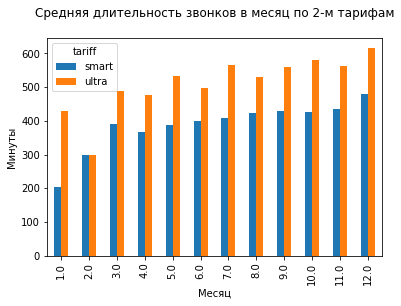

In [45]:
all_data.pivot_table(index='tariff', columns='month', values='total_minutes', aggfunc='mean').T.plot(kind='bar')
plt.title('Средняя длительность звонков в месяц по 2-м тарифам\n')
plt.xlabel('Месяц')
plt.ylabel('Минуты')
plt.show

В среднем пользователи тарифа Ультра разговаривают дольше.

<function matplotlib.pyplot.show(*args, **kw)>

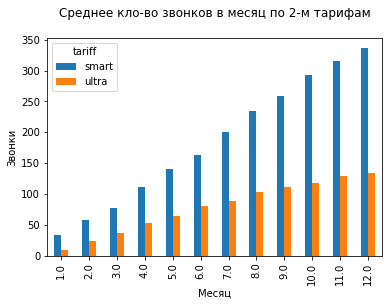

In [46]:
all_data.pivot_table(index='tariff', columns='month', values='total_minutes', aggfunc='count').T.plot(kind='bar')
plt.title('Среднее кло-во звонков в месяц по 2-м тарифам\n')
plt.xlabel('Месяц')
plt.ylabel('Звонки')
plt.show

А пользователт тарифа Смарт, совершают большее количество звонков. Ну их и больше.

<function matplotlib.pyplot.show(*args, **kw)>

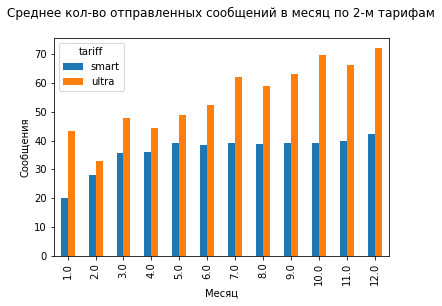

In [47]:
all_data.pivot_table(index='tariff', columns='month', values='total_message', aggfunc='mean').T.plot(kind='bar')
plt.title('Среднее кол-во отправленных сообщений в месяц по 2-м тарифам\n')
plt.xlabel('Месяц')
plt.ylabel('Сообщения')
plt.show

И так же пользователи тарифа Ультра отправляют больше сообщений. 

<function matplotlib.pyplot.show(*args, **kw)>

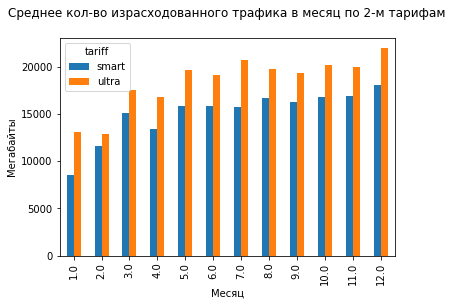

In [48]:
all_data.pivot_table(index='tariff', columns='month', values='total_mb_used', aggfunc='mean').T.plot(kind='bar')
plt.title('Среднее кол-во израсходованного трафика в месяц по 2-м тарифам\n')
plt.xlabel('Месяц')
plt.ylabel('Мегабайты')
plt.show

И интернетом пользуются больше.

<function matplotlib.pyplot.show(*args, **kw)>

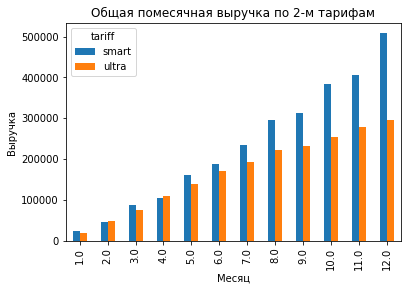

In [49]:
all_data.pivot_table(index='tariff', columns='month', values='total_revenue', aggfunc='sum').T.plot(kind='bar')
plt.title('Общая помесячная выручка по 2-м тарифам')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.show

Большую часть выручки генерируют пользователи тарифа Смарт. Но это не показатель, так как их просто больше в этой выборке. Посмотрим на среднию помесячную выручку.

<function matplotlib.pyplot.show(*args, **kw)>

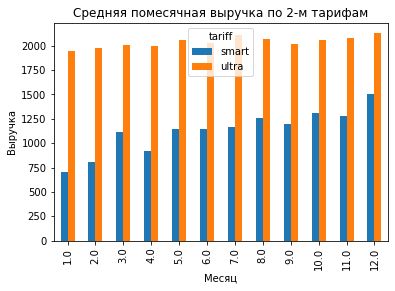

In [50]:
all_data.pivot_table(index='tariff', columns='month', values='total_revenue', aggfunc='mean').T.plot(kind='bar')
plt.title('Средняя помесячная выручка по 2-м тарифам')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.show

Среднее нам показывает диаметрально противоположную картину. Среднемесячная выручка больше от пользователей Ультра.

In [51]:
#Смотрим общую выручку по тарифам
all_data.pivot_table(index='tariff', values='total_revenue', aggfunc='sum')

,total_revenue
tariff,
smart,2.749686e+06
ultra,2.031572e+06


In [52]:
#кол-во пользователей по тарифам
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [53]:
all_data.query('tariff == "ultra" and total_minutes > 550')

,index,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,...,total_message,total_mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_revenue
9,18,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,9.0,...,91.0,12479.0,1000,30720,3000,1950,150,1,1,1950.000000
10,19,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,10.0,...,83.0,14779.0,1000,30720,3000,1950,150,1,1,1950.000000
11,20,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,11.0,...,94.0,11368.0,1000,30720,3000,1950,150,1,1,1950.000000
12,21,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,12.0,...,75.0,10132.0,1000,30720,3000,1950,150,1,1,1950.000000
22,99,1013,36,NaT,Иваново,Борис,Андреенко,2018-11-14,ultra,12.0,...,25.0,20755.0,1000,30720,3000,1950,150,1,1,1950.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,3182,1493,71,NaT,Красноярск,Таисия,Ахматулина,2018-11-24,ultra,12.0,...,78.0,42776.0,1000,30720,3000,1950,150,1,1,3716.015625
982,3189,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra,9.0,...,82.0,33105.0,1000,30720,3000,1950,150,1,1,2299.365234
983,3190,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra,10.0,...,82.0,29393.0,1000,30720,3000,1950,150,1,1,1950.000000
984,3191,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra,11.0,...,79.0,38972.0,1000,30720,3000,1950,150,1,1,3158.789062


In [54]:
#Смотрим наиболее ценных клиентов
all_data.pivot_table(index=['user_id', 'first_name', 'last_name', 'tariff', 'city'], values='total_revenue', aggfunc='sum').sort_values(by='total_revenue', ascending=False).head(15)

,,,,,total_revenue
user_id,first_name,last_name,tariff,city,
1240,Зинаида,Шарова,ultra,Воронеж,31798.242188
1385,Алиса,Дубинина,ultra,Москва,27672.363281
1185,Мануэла,Родина,ultra,Санкт-Петербург,27421.435547
1496,Трифон,Блохин,smart,Вологда,27397.679688
1180,Лев,Мишин,ultra,Москва,26279.443359
1292,Веселина,Алексеенко,ultra,Красноярск,25742.138672
1168,Лилия,Ананьева,ultra,Кострома,25145.361328
1227,Раиса,Калинина,smart,Санкт-Петербург,25062.789062
1072,Андрей,Андрейкин,smart,Уфа,24873.250000


В топе подавляющее большинство пользователей Ультра.

Посмотрим описательные статистики по тарифам:

In [55]:
#датафрейм пользователей Смарт
data_smart = all_data.query('tariff == "smart"')
data_smart[['total_minutes', 'total_message', 'total_mb_used', 'total_revenue']].describe()

,total_minutes,total_message,total_mb_used,total_revenue
count,2223.000000,1922.000000,2228.000000,2230.000000
mean,419.062978,38.716441,16236.472621,1233.043032
std,189.325618,26.787949,5868.824472,787.644371
min,0.000000,1.000000,0.000000,550.000000
25%,285.000000,17.000000,12668.500000,550.000000
50%,423.000000,34.000000,16532.000000,959.546875
75%,545.500000,55.000000,20068.000000,1667.587891
max,1435.000000,143.000000,38610.000000,6711.015625


In [56]:
#датафрейм пользователей Ультра
data_ultra = all_data.query('tariff == "ultra"')
data_ultra[['total_minutes', 'total_message', 'total_mb_used', 'total_revenue']].describe()

,total_minutes,total_message,total_mb_used,total_revenue
count,951.000000,795.000000,975.000000,986.000000
mean,545.451104,61.161006,19686.767179,2060.417872
std,306.925754,45.931026,9952.057054,356.141530
min,0.000000,1.000000,0.000000,1950.000000
25%,310.000000,24.000000,12020.500000,1950.000000
50%,528.000000,51.000000,19411.000000,1950.000000
75%,756.500000,87.500000,26920.500000,1950.000000
max,1673.000000,224.000000,49789.000000,4743.310547


In [57]:
#смотрим среднюю и общую выручку по городам. Сортируем по общей выручке
all_data.pivot_table(index=['city'], values='total_revenue', aggfunc=('count', 'sum', 'mean')).sort_values('sum',ascending=False)

,count,mean,sum
city,,,
Москва,611,1507.276762,920946.101562
Санкт-Петербург,270,1565.440784,422669.011719
Новосибирск,98,1732.636699,169798.396484
Уфа,95,1488.785855,141434.656250
Краснодар,86,1519.662518,130690.976562
...,...,...,...
Кемерово,5,1825.695312,9128.476562
Владикавказ,7,1208.459821,8459.218750
Волжский,8,924.487305,7395.898438


In [58]:
#смотрим среднюю и общую выручку по городам. Сортируем по средней выручке
all_data.pivot_table(index=['city'], values='total_revenue', aggfunc=('count', 'sum', 'mean')).sort_values('mean',ascending=False)

,count,mean,sum
city,,,
Воронеж,39,2262.422927,88234.494141
Саранск,22,2101.732599,46238.117188
Череповец,14,2073.248326,29025.476562
Оренбург,13,2026.867188,26349.273438
Брянск,28,2021.238491,56594.677734
...,...,...,...
Подольск,12,912.596354,10951.156250
Новороссийск,26,794.809796,20665.054688
Белгород,15,717.972917,10769.593750


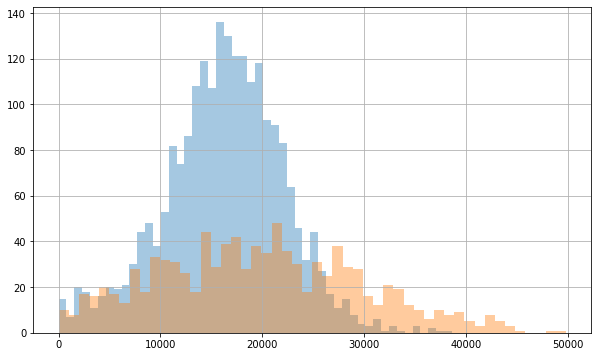

In [60]:
all_data.query('tariff == "smart"')['total_mb_used'].hist(bins = 50, alpha = 0.4, figsize=(10,6))
all_data.query('tariff == "ultra"')['total_mb_used'].hist(bins = 50, alpha = 0.4, figsize=(10,6))

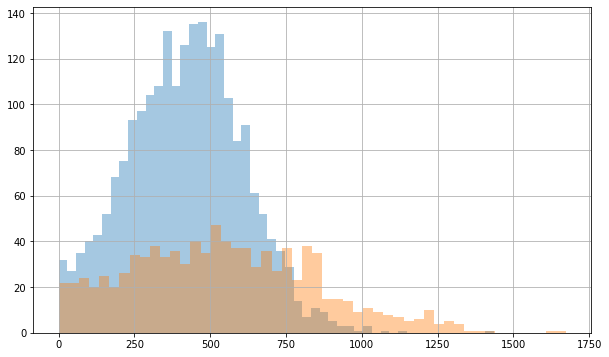

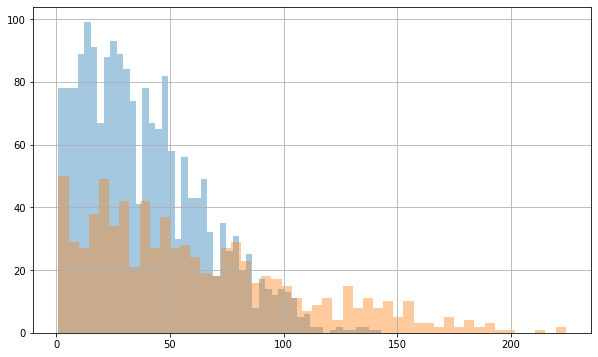

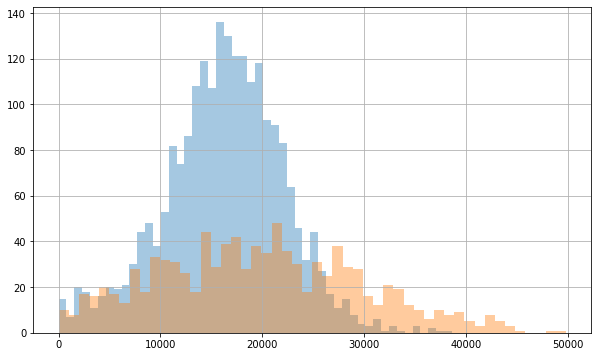

In [62]:
param = ['total_minutes', 'total_message', 'total_mb_used']
tariff = ['smart', 'ultra']
for i in param:
    for j in tariff:
        all_data.query('tariff == @j')[i].hist(bins = 50, alpha = 0.4, figsize=(10,6))
    plt.show()

Что бы построить графики методом distplot(), заполним пропуски в интересующих нас столбцах 'total_minutes', 'total_message', 'total_mb_used'. Заполнять будем нулями. Можно предположить, что если в какой-то из колонок пропуск, то человек просто не пользовался этой услугой.

In [63]:
#заполняем пропуски
all_data[['total_minutes', 'total_message', 'total_mb_used']] = all_data[['total_minutes', 'total_message', 'total_mb_used']].fillna(0)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 22 columns):
index                    3216 non-null int64
user_id                  3216 non-null int64
age                      3216 non-null int64
churn_date               189 non-null datetime64[ns]
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
month                    3214 non-null float64
total_minutes            3216 non-null float64
total_calls              3174 non-null float64
total_message            3216 non-null float64
total_mb_used            3216 non-null float64
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per

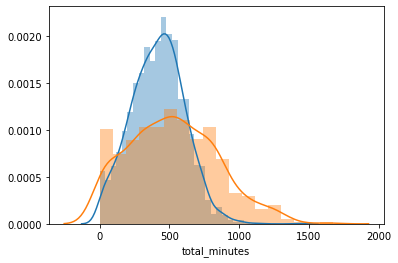

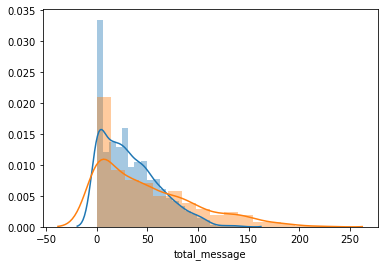

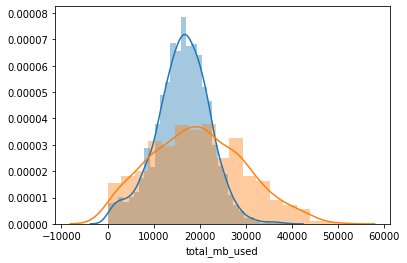

In [64]:
#строим графики распределений
param = ['total_minutes', 'total_message', 'total_mb_used']
tariff = ['smart', 'ultra']
for i in param:
    for j in tariff:
        sns.distplot(all_data.query('tariff == @j')[i], label = j)
    plt.show()

## Мы посчитали сколько минут, сообщений и трафика требуется пользователям каждого тарифа в месяц. А так же посмотрели как ведут себя пользователи. Увидели, что большую часть выручки генерируют пользователи тарифа Смарт. Но показатели в средней длительности звонков, отправки смс и использования трафика выше у пользователей тарифа Смарт.

# Шаг 4. Проверка гипотезы.
## -средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
## -средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Проверим распределения на нормальность. Для этого применим тест Шапиро-Уилка и построим qqplot.

Тест на нормальность: (0.825406551361084, 4.624284932271896e-44)


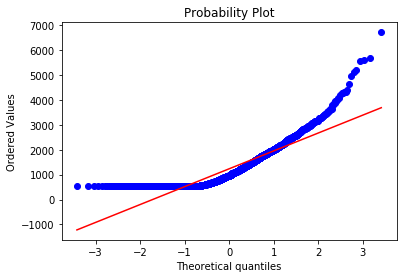

In [65]:
import scipy.stats as stats
stats.probplot(data_smart['total_revenue'], dist="norm", plot=plt)
print("Тест на нормальность:", stats.shapiro(data_smart['total_revenue']))
plt.show()

Тест на нормальность: (0.3553961515426636, 0.0)


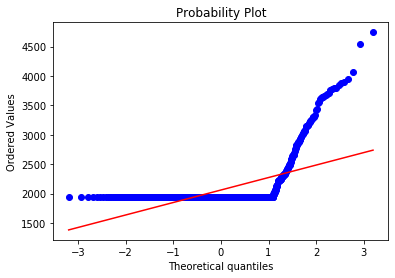

In [66]:
stats.probplot(data_ultra['total_revenue'], dist="norm", plot=plt)
print("Тест на нормальность:", stats.shapiro(data_ultra['total_revenue']))
plt.show()

Оба распределения ненормальные.

Формируем нулевую и альтернативную гипотезы. Нулевая гипотеза: Средняя выручка пользователей тарифов Ультра и Смарт равны. Альтернативная гипотеза: средняя выручка по двум тарифам различается.

In [67]:
#проверим равны ли дисперсии двух выборок или нет, для того, что бы понять стоит ли указывать параметр equal_var
#для этого воспользуемся тестом Левина
from scipy.stats import levene
stat, p = levene(data_ultra['total_revenue'], data_smart['total_revenue'])
print(p)

2.3978183884963865e-115


Малое значение p-value говорит нам о том, что выборки не имеют равных дисперсий.

In [68]:
from scipy import stats as st
alpha = .05
smart_revenue = data_smart['total_revenue']
ultra_revenue = data_ultra['total_revenue']
results = st.ttest_ind(smart_revenue, ultra_revenue, equal_var=False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  3.665639404941842e-296
Отвергаем нулевую гипотезу


Формируем нулевую и альтернативную гипотезы. Нулевая гипотеза: Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов. Альтернативная гипотеза: средняя пользователей из Москвы отличается от выручки пользователей из других регионов.

In [69]:
#посмотрим на дисперсии двух выборок, для определения параметра equal_var
print('Дисперсия по пользователям из Москвы:',all_data.query('city == "Москва"')['total_revenue'].var(ddof=1))
print('Дисперсия по пользователям из других регионов:',all_data.query('city != "Москва"')['total_revenue'].var(ddof=1))

Дисперсия по пользователям из Москвы: 547242.7498927494
Дисперсия по пользователям из других регионов: 630437.2712032774


In [70]:
alpha = .05
moscow_revenue = all_data.query('city == "Москва"')
other_region_revenue = all_data.query('city != "Москва"')
results2 = st.ttest_ind(moscow_revenue['total_revenue'], other_region_revenue['total_revenue'], equal_var=False)
print('p-значение: ', results2.pvalue)
if (results2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.4517561756356935
Не получилось отвергнуть нулевую гипотезу


## Мы сформировали интересующие нас гипотезы и получили следующий результат: мы отвергли гипотезу о равенстве средних выручек по двум тарифам и смогли отвергнуть гипотезу о том, что средняя выручка пользователей из москвы равна средней выручке пользователей из других регионов.

# Шаг 5. Общий вывод.
## Мы изучили и проанализировали полученные данные пользователей по двум тарифам и можем сделать следующий вывод:
## На мой взгляд вопрос "какой тариф 'лучше'", звучит не вполне конкретно. На основании анализа данных, большую часть выручки приносит тариф Смарт(но я думаю, что технически у оператора на пользователей этого тарифа больше затрат), но более дорогие клиенты у тарифа Ультра и в среднем они приносят больше выручки.